# VC-PBLH Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [9]:
data = pd.read_csv('../datos/dataframes_VC/vc_ALL.csv', index_col = 0)
data.index = pd.to_datetime(data.index)

In [10]:
data.head()

,VC,pblh,u_mean,O3,PM2.5,PM10
2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 01:00:00,NaN,NaN,NaN,26.0,81.0,114.0
2015-01-01 02:00:00,NaN,NaN,NaN,27.0,82.0,113.0
2015-01-01 03:00:00,NaN,NaN,NaN,22.0,84.0,114.0
2015-01-01 04:00:00,NaN,NaN,NaN,23.0,80.0,107.0


In [11]:
day_data = data.between_time('08:00', '18:00')

## Ozone

In [18]:
ny, nx = 512, 512

xi = np.linspace(100, 3500, nx)
yi = np.linspace(1, 14, ny)
xxx, yyy = np.meshgrid(xi, yi)
VC_grid = xxx*yyy

In [19]:
plt.rcParams.update({'font.size': 13})

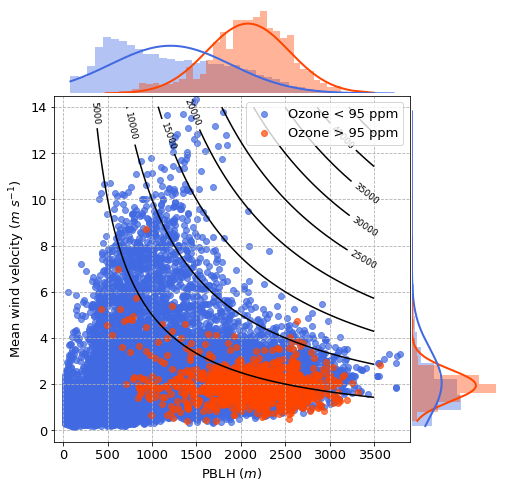

In [20]:
color_1 = 'orangered'
color_2 = 'royalblue'
nom_o3 = 95
bins = 128

h = np.sort(day_data.loc[day_data.O3 > 95]['pblh'].dropna())
j = np.sort(day_data.loc[day_data.O3 < 95]['pblh'].dropna())

fit_h = stats.norm.pdf(h, np.mean(h), np.std(h))
# kde_h = stats.gaussian_kde(h)
# x_h = np.linspace(h.min(), h.max(), bins)
# fit_h = kde_h(x_h)

fit_j = stats.norm.pdf(j, np.mean(j), np.std(j))
kernel_h = stats.gaussian_kde(j)

k = sorted(day_data.loc[day_data.O3 > 95]['u_mean'].dropna())
l = sorted(day_data.loc[day_data.O3 < 95]['u_mean'].dropna())

fit_k = stats.norm.pdf(k, np.mean(k), np.std(k))
kernel_k = stats.gaussian_kde(k)
fit_l = stats.norm.pdf(l, np.mean(l), np.std(l))
kernel_l = stats.gaussian_kde(l)

fig = plt.figure(figsize=(8,8))
gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.01, hspace=0.01)

ax1 = fig.add_subplot(gs[0])
ax1.hist(day_data.loc[day_data.O3 < 95]['pblh'],density = True, alpha = 0.4, color = color_2, bins = 40)
ax1.hist(day_data.loc[day_data.O3 > 95]['pblh'],density = True, alpha = 0.4, color = color_1, bins = 40)
ax1.plot(h,fit_h, c = color_1, linewidth=2)
#ax1.plot(x_h, fit_h, c = color_1, linewidth=2)
ax1.plot(j,fit_j, c = color_2, linewidth=2)
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[1])
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[2])
#CS = ax3.contour(xi,yi,VC_grid, colors='k', levels=[3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000],alpha = 0.7)
#ax3.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')
ax3.scatter(day_data.loc[day_data.O3 < nom_o3]['pblh'], day_data.loc[day_data.O3 < nom_o3]['u_mean'], 
            c = color_2, alpha = 0.7, label = "Ozone < 95 ppm")
ax3.scatter(day_data.loc[day_data.O3 > nom_o3]['pblh'], day_data.loc[day_data.O3 > nom_o3]['u_mean'], 
            c = color_1, alpha = 0.7, label = "Ozone > 95 ppm")
ax3.set_xlabel(r'PBLH ($m$)', fontsize = 13)
ax3.set_ylabel(r'Mean wind velocity ($m \ s^{-1}$)', fontsize = 13)
ax3.set_xlim(-100,3900)
ax3.set_ylim(-0.5,14.5)
ax3.legend()
# ax3.text(0.9, 0.02, 'data', transform=ax3.transAxes)
ax3.grid(linestyle='--')
CS = ax3.contour(xxx,yyy, VC_grid, 11, colors='k')
ax3.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')
ax3.

ax4 = fig.add_subplot(gs[3])
ax4.hist(day_data.loc[day_data.O3 < 95]['u_mean'],density = True, alpha = 0.4, color = color_2, bins = 20, 
         orientation = "horizontal")
ax4.hist(day_data.loc[day_data.O3 > 95]['u_mean'],density = True, alpha = 0.4, color = color_1, bins = 20,
        orientation = "horizontal")

ax4.plot(fit_k, k, c = color_1, linewidth=2)
ax4.plot(fit_l, l, c = color_2, linewidth=2)
ax4.set_axis_off()

ax4.set_axis_off()

## PM2.5

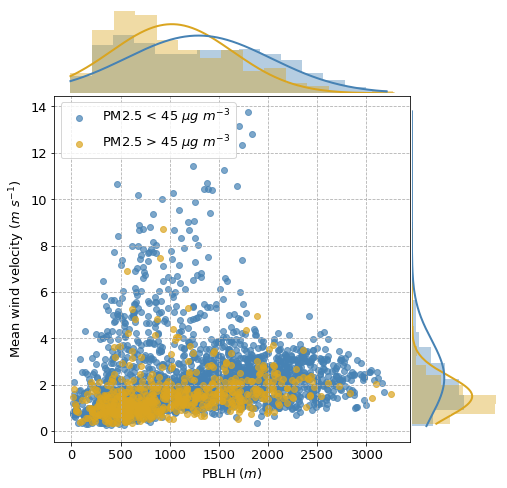

In [7]:
color_1 = 'goldenrod'
color_2 = 'steelblue'
nom_pm25 = 45

h = sorted(day_data.loc[day_data['PM2.5'] > nom_pm25]['pblh'].dropna())
j = sorted(day_data.loc[day_data['PM2.5'] < nom_pm25]['pblh'].dropna())

fit_h = stats.norm.pdf(h, np.mean(h), np.std(h))
fit_j = stats.norm.pdf(j, np.mean(j), np.std(j))

k = sorted(day_data.loc[day_data['PM2.5'] > nom_pm25]['u_mean'].dropna())
l = sorted(day_data.loc[day_data['PM2.5'] < nom_pm25]['u_mean'].dropna())

fit_k = stats.norm.pdf(k, np.mean(k), np.std(k))
fit_l = stats.norm.pdf(l, np.mean(l), np.std(l))

fig = plt.figure(figsize=(8,8))
gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.01, hspace=0.01)

ax1 = fig.add_subplot(gs[0])
ax1.hist(day_data.loc[day_data['PM2.5'] < nom_pm25]['pblh'],density = True, alpha = 0.4, color = color_2, bins = 15)
ax1.hist(day_data.loc[day_data['PM2.5'] > nom_pm25]['pblh'],density = True, alpha = 0.4, color = color_1, bins = 15)
ax1.plot(h,fit_h, c = color_1, linewidth=2)
ax1.plot(j,fit_j, c = color_2, linewidth=2)
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[1])
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[2])
#CS = ax3.contour(xi,yi,VC_grid, colors='k', levels=[3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000],alpha = 0.7)
#ax3.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')
ax3.scatter(day_data.loc[day_data['PM2.5'] < nom_pm25]['pblh'], day_data.loc[day_data['PM2.5'] < nom_pm25]['u_mean'], 
            c = color_2, alpha = 0.7, label = r"PM2.5 < 45 $\mu g \ m^{-3}$")
ax3.scatter(day_data.loc[day_data['PM2.5'] > nom_pm25]['pblh'], day_data.loc[day_data['PM2.5'] > nom_pm25]['u_mean'], 
            c = color_1, alpha = 0.7, label = r"PM2.5 > 45 $\mu g \ m^{-3}$")
ax3.set_xlabel(r'PBLH ($m$)', fontsize = 13)
ax3.set_ylabel(r'Mean wind velocity ($m \ s^{-1}$)', fontsize = 13)
ax3.legend()
ax3.grid(linestyle='--')

ax4 = fig.add_subplot(gs[3])
ax4.hist(day_data.loc[day_data['PM2.5'] < nom_pm25]['u_mean'],density = True, alpha = 0.4, color = color_2, bins = 20, 
         orientation = "horizontal")
ax4.hist(day_data.loc[day_data['PM2.5'] > nom_pm25]['u_mean'],density = True, alpha = 0.4, color = color_1, bins = 20,
        orientation = "horizontal")
ax4.plot(fit_k, k, c = color_1, linewidth=2)
ax4.plot(fit_l, l, c = color_2, linewidth=2)
ax4.set_axis_off()

## PM10

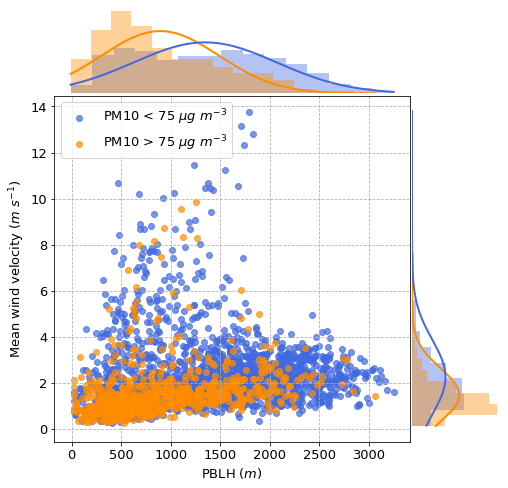

In [8]:
color_1 = 'darkorange'
color_2 = 'royalblue'
nom_pm10 = 75

h = sorted(day_data.loc[day_data['PM10'] > nom_pm10]['pblh'].dropna())
j = sorted(day_data.loc[day_data['PM10'] < nom_pm10]['pblh'].dropna())

fit_h = stats.norm.pdf(h, np.mean(h), np.std(h))
fit_j = stats.norm.pdf(j, np.mean(j), np.std(j))

k = sorted(day_data.loc[day_data['PM10'] > nom_pm10]['u_mean'].dropna())
l = sorted(day_data.loc[day_data['PM10'] < nom_pm10]['u_mean'].dropna())

fit_k = stats.norm.pdf(k, np.mean(k), np.std(k))
fit_l = stats.norm.pdf(l, np.mean(l), np.std(l))

fig = plt.figure(figsize=(8,8))
gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.01, hspace=0.01)

ax1 = fig.add_subplot(gs[0])
ax1.hist(day_data.loc[day_data['PM10'] < nom_pm10]['pblh'],density = True, alpha = 0.4, color = color_2, bins = 15)
ax1.hist(day_data.loc[day_data['PM10'] > nom_pm10]['pblh'],density = True, alpha = 0.4, color = color_1, bins = 15)
ax1.plot(h,fit_h, c = color_1, linewidth=2)
ax1.plot(j,fit_j, c = color_2, linewidth=2)
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[1])
ax2.set_axis_off()

ax3 = fig.add_subplot(gs[2])
#CS = ax3.contour(xi,yi,VC_grid, colors='k', levels=[3000, 6000, 9000, 12000, 15000, 18000, 21000, 24000],alpha = 0.7)
#ax3.clabel(CS, fontsize=9, inline=1, fmt = '%1.0f')
ax3.scatter(day_data.loc[day_data['PM10'] < nom_pm10]['pblh'], day_data.loc[day_data['PM10'] < nom_pm10]['u_mean'], 
            c = color_2, alpha = 0.7, label = "PM10 < 75 $\mu g \ m^{-3}$")
ax3.scatter(day_data.loc[day_data['PM10'] > nom_pm10]['pblh'], day_data.loc[day_data['PM10'] > nom_pm10]['u_mean'], 
            c = color_1, alpha = 0.7, label = "PM10 > 75 $\mu g \ m^{-3}$")
ax3.set_xlabel(r'PBLH ($m$)', fontsize = 13)
ax3.set_ylabel(r'Mean wind velocity ($m \ s^{-1}$)', fontsize = 13)
ax3.legend()
ax3.grid(linestyle='--')

ax4 = fig.add_subplot(gs[3])
ax4.hist(day_data.loc[day_data['PM10'] < nom_pm10]['u_mean'],density = True, alpha = 0.4, color = color_2, bins = 20, 
         orientation = "horizontal")
ax4.hist(day_data.loc[day_data['PM10'] > nom_pm10]['u_mean'],density = True, alpha = 0.4, color = color_1, bins = 20,
        orientation = "horizontal")
ax4.plot(fit_k, k, c = color_1, linewidth=2)
ax4.plot(fit_l, l, c = color_2, linewidth=2)
ax4.set_axis_off()

# Hexbin

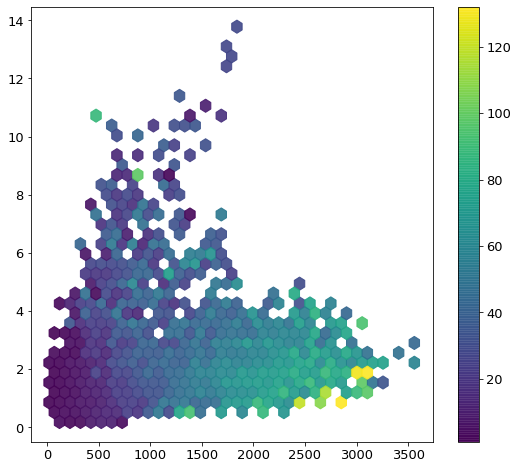

In [38]:
plt.figure(figsize=(9,8))
plt.hexbin(day_data['pblh'], day_data['u_mean'], C = day_data['O3'], gridsize=35, alpha = 0.9)
plt.colorbar()

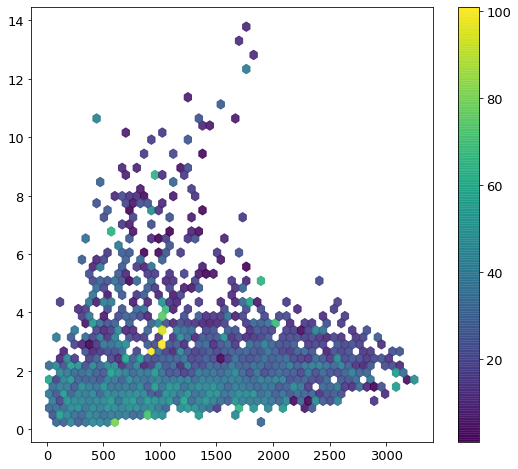

In [28]:
plt.figure(figsize=(9,8))
plt.hexbin(day_data['pblh'], day_data['u_mean'], C = day_data['PM2.5'], gridsize=50, alpha = 0.9)
plt.colorbar()